# Quarentena de dados - Aula 01
### Introdução

In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filmes = pd.read_csv('datasets/movies.csv')
avaliacoes = pd.read_csv('datasets/ratings.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [4]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Analise Exploratória de dados (EDA)

In [6]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
filmes.shape

(9742, 3)

In [8]:
avaliacoes.query('filmeId == 1').mean()['nota']

3.9209302325581397

In [9]:
avaliacoesMedia = avaliacoes.groupby('filmeId')['nota'].mean()
avaliacoesMedia.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [10]:
avaliacoesMedia.shape

(9724,)

In [11]:
filmesComMediaComNaN = filmes.join(avaliacoesMedia, on='filmeId', how='left')
filmesComMediaComNaN['notas'] = filmesComMediaComNaN.pop('nota')
filmesComMediaComNaN.head()

,filmeId,titulo,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [12]:
filmesComMediaComNaN.sort_values('notas', ascending=False)

,filmeId,titulo,generos,notas
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [13]:
filmesComMedia = filmes.join(avaliacoesMedia, on='filmeId', how='right')
filmesComMedia['notas'] = filmesComMedia.pop('nota')
filmesComMedia.head()

,filmeId,titulo,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [14]:
filmesComMedia.sort_values('notas', ascending=False)

,filmeId,titulo,generos,notas
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
9271,157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,0.5
7553,85334,Hard Ticket to Hawaii (1987),Action|Comedy,0.5
6503,53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,0.5
5210,8494,"Cincinnati Kid, The (1965)",Drama,0.5


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [15]:
filmesSemMedia = filmesComMediaComNaN[filmesComMediaComNaN['notas'].isna()].reset_index().drop('index', axis=1)

filmesSemMedia

,filmeId,titulo,generos,notas
0,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
1,2939,Niagara (1953),Drama|Thriller,NaN
2,3338,For All Mankind (1989),Documentary,NaN
3,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
4,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
5,5721,"Chosen, The (1981)",Drama,NaN
6,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
7,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
8,7020,Proof (1991),Comedy|Drama|Romance,NaN
9,7792,"Parallax View, The (1974)",Thriller,NaN


In [16]:
len(filmesSemMedia)

18

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [17]:
filmesComMediaComNaN

,filmeId,titulo,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [18]:
filmesComMediaComNaN.rename(columns={'notas': 'nota_média'}, inplace=True)
filmesComMediaComNaN

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [19]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
avaliacoes2 = avaliacoes.groupby('filmeId').agg({'nota': 'mean', 'usuarioId': 'count'}).reset_index()
avaliacoes2.columns = ['filmeId', 'nota_média', 'n_de_avaliacoes']
avaliacoes2.head()

,filmeId,nota_média,n_de_avaliacoes
0,1,3.920930,215
1,2,3.431818,110
2,3,3.259615,52
3,4,2.357143,7
4,5,3.071429,49


In [22]:
filmes.shape

(9742, 3)

In [23]:
avaliacoesVotoMedia = filmes.merge(avaliacoes2, on='filmeId', how='left')
#filmesComMedia = filmes.join(avaliacoesMedia, on='filmeId', how='right')

avaliacoesVotoMedia.head()

,filmeId,titulo,generos,nota_média,n_de_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [24]:
filmesComMedia.head()

,filmeId,titulo,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [25]:
filmesComMedia['notas'] = filmesComMedia['notas'].round(2)
filmesComMedia.head()

,filmeId,titulo,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [26]:
#filmes.groupby('generos').count().reset_index()[['generos']]
listaDeGeneros = filmes['generos'].str.get_dummies('|').columns.to_list()
listaDeGeneros

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [1]:
generos = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
generos

NameError: name 'filmes' is not defined

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

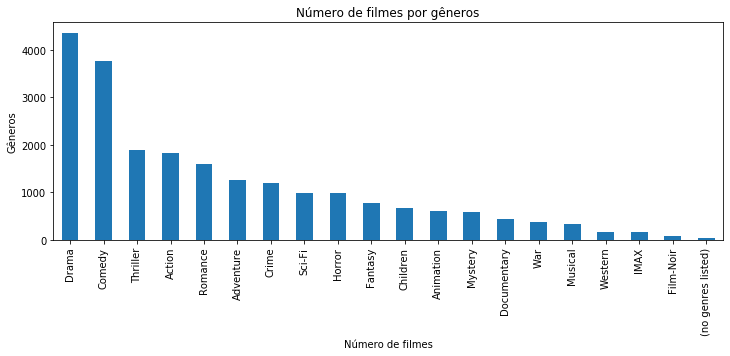

In [33]:
%matplotlib inline 
nDeFilmesPorGenero.plot(kind='bar', figsize=(12,4))
plt.title('Número de filmes por gêneros')
plt.xlabel('Número de filmes')
plt.ylabel('Gêneros')
plt.show()